# &#x1F4D1; &nbsp; <span style="color:#338DD4"> Reflections. Intro to Algorithms. Lessons 1-2</span>

###  &#x1F578; &nbsp; Links

###  &#x1F578; &nbsp;  Lesson 1. A Social Network

Эйлеровым путем в графе называется путь, который проходит по каждому ребру, причем ровно один раз.

В неориентированном графе
Согласно теореме, доказанной Эйлером, эйлеров цикл существует тогда и только тогда, когда граф связный и в нём отсутствуют вершины нечётной степени.
Эйлеров путь в графе существует тогда и только тогда, когда граф связный и содержит не более двух вершин нечётной степени. Ввиду леммы о рукопожатиях, число вершин с нечётной степенью должно быть четным. А значит эйлеров путь существует только тогда, когда это число равно нулю или двум. Причём когда оно равно нулю, эйлеров путь вырождается в эйлеров цикл.

В ориентированном графе
Ориентированный граф G=(V,A) содержит эйлеров цикл тогда и только тогда, когда он сильно связан и для каждой вершины графа её полустепень захода равна её полустепени исхода, то есть в вершину входит столько же ребер, сколько из неё и выходит.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
G=nx.complete_graph(7)
print(list(nx.eulerian_circuit(G)))
print('')
print(list(nx.eulerian_circuit(G,source=1)))
print('')
print([u for u,v in nx.eulerian_circuit(G)])

[(0, 6), (6, 5), (5, 4), (4, 6), (6, 3), (3, 5), (5, 2), (2, 4), (4, 3), (3, 2), (2, 6), (6, 1), (1, 5), (5, 0), (0, 4), (4, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 0)]

[(1, 6), (6, 5), (5, 4), (4, 6), (6, 3), (3, 5), (5, 2), (2, 4), (4, 3), (3, 2), (2, 6), (6, 0), (0, 5), (5, 1), (1, 4), (4, 0), (0, 3), (3, 1), (1, 2), (2, 0), (0, 1)]

[0, 6, 5, 4, 6, 3, 5, 2, 4, 3, 2, 6, 1, 5, 0, 4, 1, 3, 0, 2, 1]


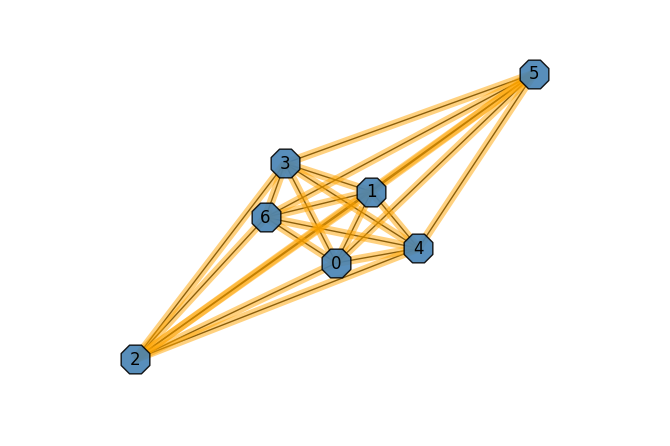

In [3]:
pos=nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=True, node_shape='8', node_size=500, 
        node_color='steelblue', edge_color='black', width=1, alpha=0.9)
nx.draw_networkx_edges(G, pos, edgelist=list(nx.eulerian_circuit(G)),
                       edge_color = 'orange', width=6, alpha=0.5)

In [4]:
def subgraph(visited, _current, graph):
    if not graph:
        return visited + [_current]

    for i, edge in enumerate(graph):
        current, next = edge
        if _current not in edge:
            continue

        _graph = graph[:]
        del _graph[i]

        if _current == current:
            result = subgraph(visited + [current], next, _graph)
        else:
            result = subgraph(visited + [next], current, _graph)

        if result:
            return result
def eulerian_tour(graph):
    head, tail = graph[0], graph[1:]
    previous, next = head
    return subgraph([previous], next, tail)

In [5]:
print(eulerian_tour([(1, 2), (2, 3), (3, 4), (4, 1)]))

[1, 2, 3, 4, 1]


In [8]:
# Case Study
def naive(a, b):
    x = a
    y = b
    z = 0
    while x > 0:
        z = z + y
        x = x - 1
    return z

In [9]:
print(naive(2, 30), naive(5, 7), naive(8, 15))

60 35 120


Оператор a >> n возвращает число, которое получается из a сдвигом всех бит на n позиций вправо, при этом самые правые n бит отбрасываются. Например:

a = 43      # 0b101011

b = a >> 1  # 0b10101 == 21

c = a >> 2  # 0b1010 == 10

d = a >> 3  # 0b101 == 5

e = a >> 5  # 0b1 == 1

Понятно, что для положительных чисел битовый сдвиг числа вправо на n равносилен целочисленному делению на 2^n. Для отрицательных чисел в языке Питон операции битового сдвига неприменимы.

Аналогично, битовый сдвиг влево на n бит равносилен (для положительных чисел) умножению на 2^n и осуществляется при помощи оператора <<:
a = 5       # 0b101

b = a << 1  # 0b1010 == 10

c = a << 2  # 0b10100 == 20

d = 2 << 3  # 0b101000 == 40

In [68]:
import math

def time(n):
    """ Return the number of steps 
    necessary to calculate
    `print countdown(n)`"""
    steps = 0
    if n % 5 == 0:
        steps = 2*n/5 + 3
    else:
        steps = 2*(n/5 + 1) + 3
    # YOUR CODE HERE
    return steps

print (time(50), time(51))

23.0 25.4
